In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("competition origin data/train.csv")
test_data = pd.read_csv("competition origin data/test.csv")

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

查看目标变量分布

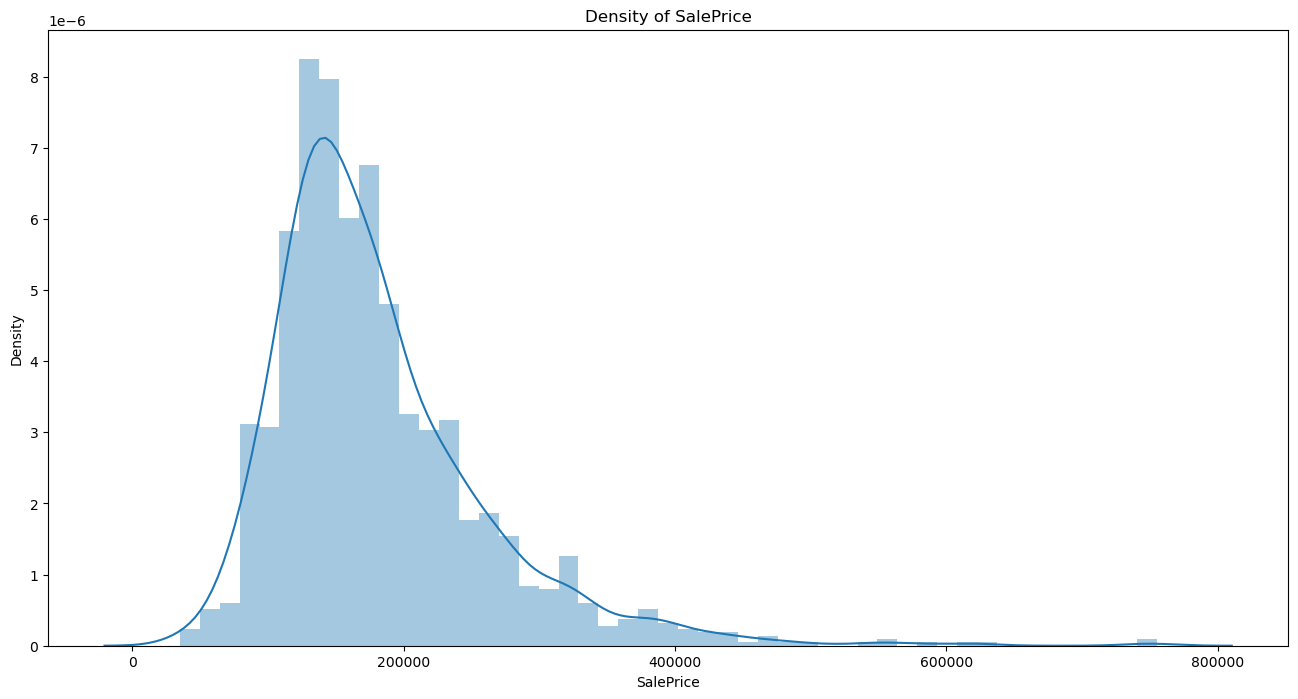

Skewness: 1.88
Kurtosis: 6.54


In [6]:
_, ax = plt.subplots(figsize=(16, 8))

sns.distplot(train_data['SalePrice']);
ax.set(xlabel="SalePrice", ylabel="Density", title="Density of SalePrice")
plt.show()

print("Skewness: {:.2f}".format(train_data['SalePrice'].skew())) #偏度
print("Kurtosis: {:.2f}".format(train_data['SalePrice'].kurt())) #峰度

我们可以发现目标变量呈现偏态分布且值域范围较大

在回归问题中，有些模型是基于正态分布假设的，例如线性回归模型，岭回归模型等，所以通常要对目标变量做一些变换使其更接近正态分布的形式

我们在后续的处理中可以将目标变量进行对数变换或coxbox变换使得目标变量更趋近于正态分布

**当然如果目标变量不符合正态分布，也可以使用树模型，支持向量回归和神经网络等不是基于正态分布假设的模型训练**

主观分析

从经验而言，这些特征可能对价格的影响比较大，可以查看这些特征与目标变量之间是否有线性关系

OverallQual: Rates the overall material and finish of the house（总体质量）

OverallCond: Rates the overall condition of the house（评价房屋的整体状况）

GrLivArea: Above grade (ground) living area square feet（地面生活区总面积）

YearBuilt: Original construction date（建成年份）

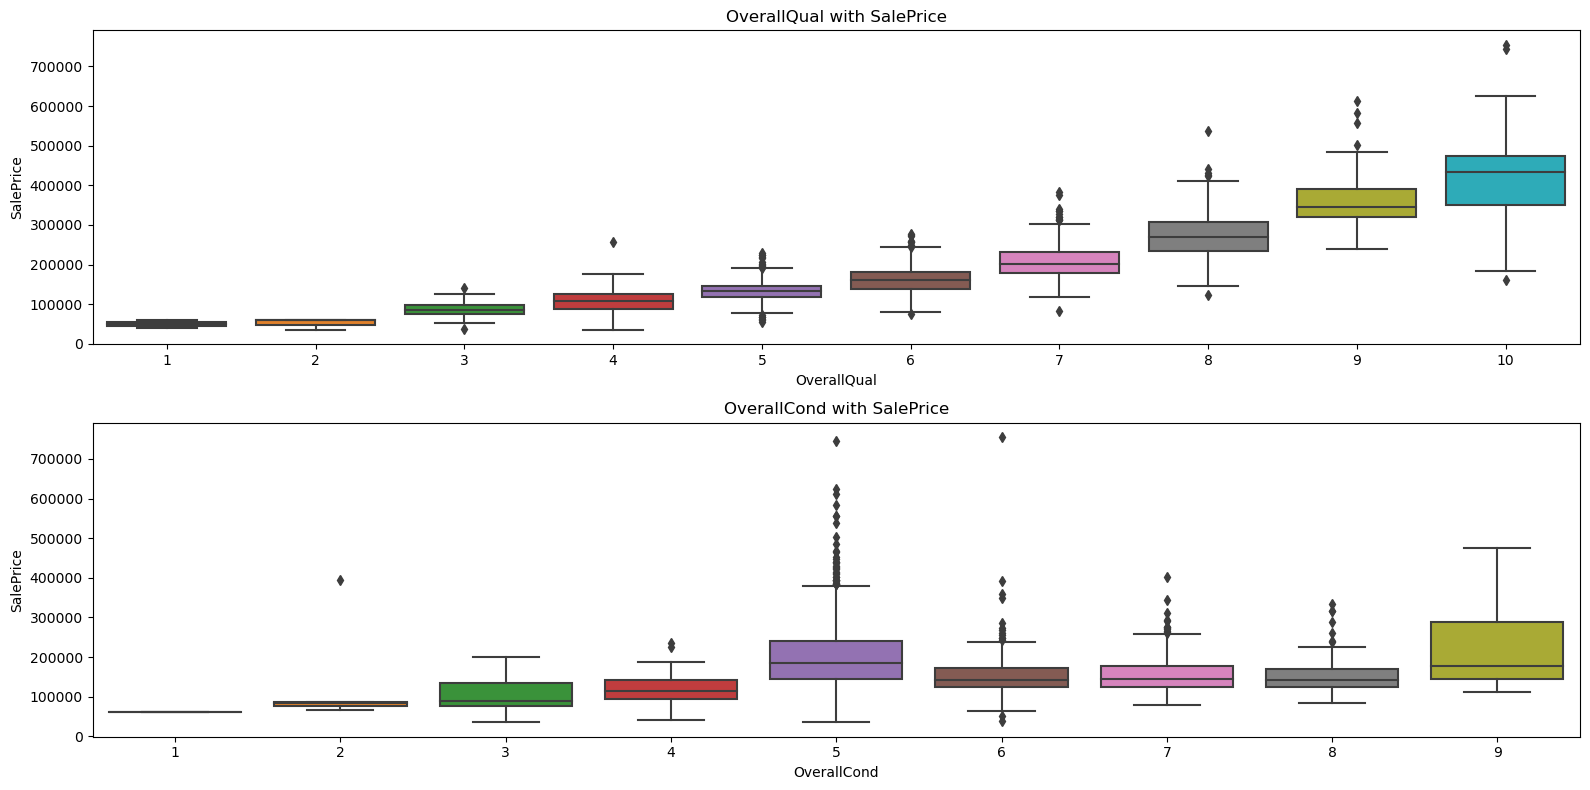

In [7]:
_, axes = plt.subplots(2, 1, figsize=(16, 8))

axes[0] = sns.boxplot(x='OverallQual', y='SalePrice', data=train_data, ax=axes[0])
axes[0].set(xlabel='OverallQual', ylabel='SalePrice', title='OverallQual with SalePrice')

axes[1] = sns.boxplot(x='OverallCond', y='SalePrice', data=train_data, ax=axes[1])
axes[1].set(xlabel='OverallCond', ylabel='SalePrice', title='OverallCond with SalePrice')

plt.tight_layout()

plt.show()

可以看到对于OverallQual而言，SalePrice基本与其成线性关系

对于OverallCond而言，SalePrice与其并没有非常明显的线性关系，可能是每个人的评价都会带有个人的主观想法，并不能和房价相关联，这也是合理的

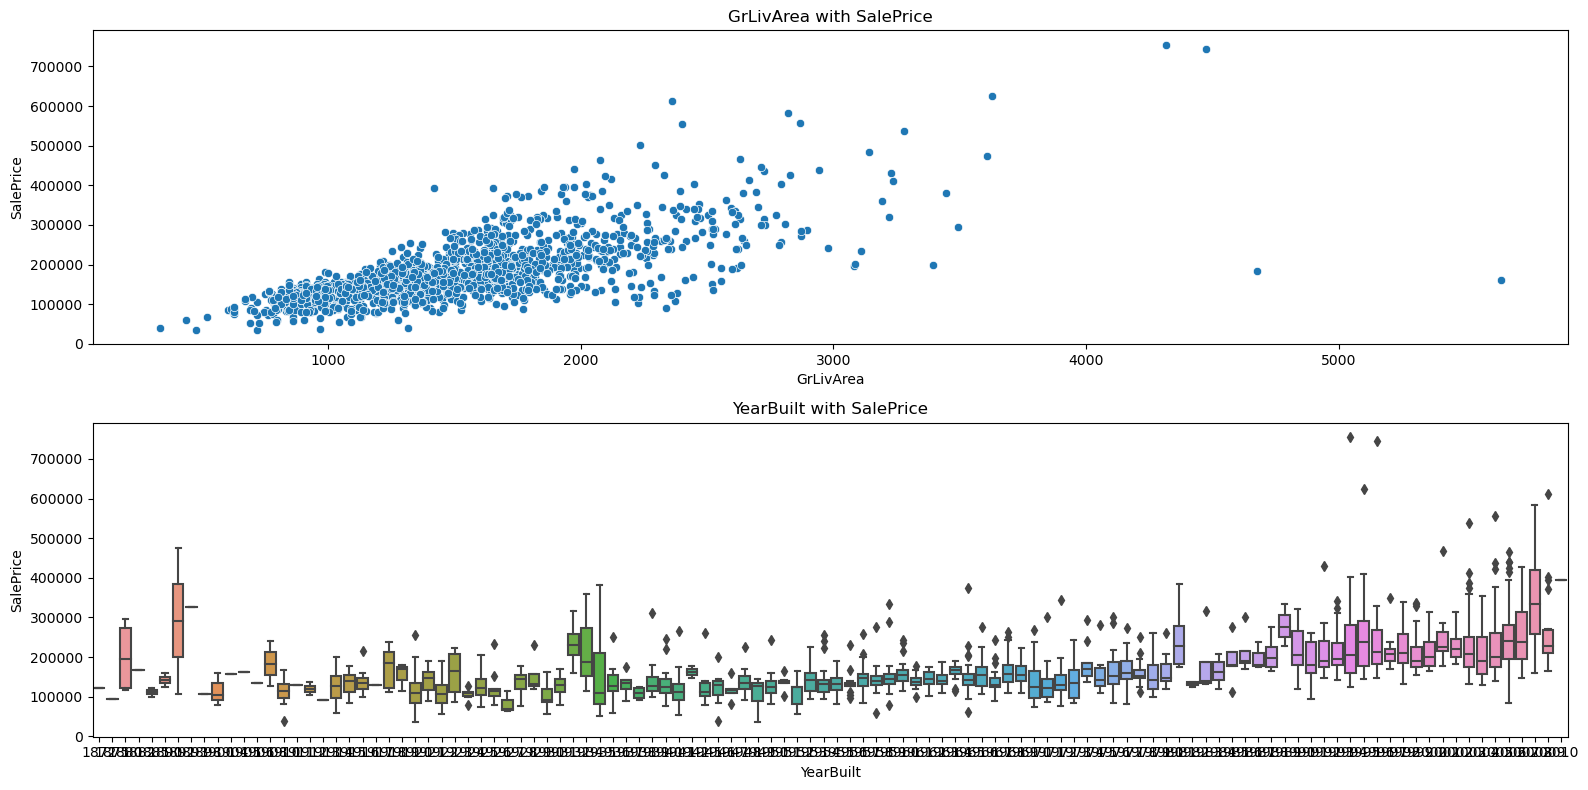

In [8]:
_, axes = plt.subplots(2, 1, figsize=(16, 8))

axes[0] = sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data, ax=axes[0])
axes[0].set(xlabel='GrLivArea', ylabel='SalePrice', title='GrLivArea with SalePrice')

axes[1] = sns.boxplot(x='YearBuilt', y='SalePrice', data=train_data, ax=axes[1])
axes[1].set(xlabel='YearBuilt', ylabel='SalePrice', title='YearBuilt with SalePrice')

plt.tight_layout()

plt.show()

可以看到，对于GrLivArea特征，SalePrice基本与其成线性关系，和我们的想法也基本一致，但是也存在一些异常值，这些值我们可以选择剔除也可以选择不删除

**注意：不是所有异常值都需要处理，只有那些明显偏离正常数据分布且可能影响建模或统计结果的异常值才需要进行处理。而大多数数据集中存在一些轻微的、合理的偏差和噪声，这些“非真实”的异常并不会对结果造成太大影响，因此无需专门对它们进行处理**

如果存在大量的异常值可以考虑使用对异常值不敏感的模型，例如树模型

对于YearBuilt特征，SalePrice与其并没有非常明显的线性关系，但是图中告诉了我们，这个特征存在较多的取值（从1872年到2010年），如果它是类别型特征，则后续用one-hot特征编码会造成维度灾难，我们需要用数字化编码（LabelEncoder）代替ont-hot

客观分析

刚才我们通过经验查看了几个特征于目标变量之间的关系，现在我们抛弃主观色彩，仅仅通过数据呈现给我们的信息进行分析

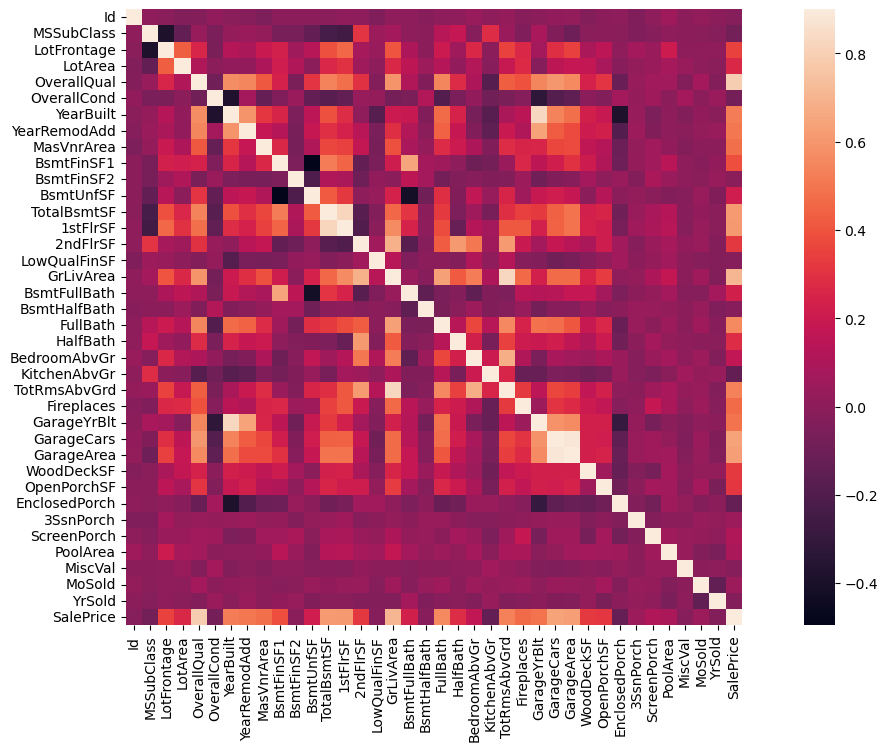

In [9]:
corr = train_data.corr()
_, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(corr, vmax=0.9, square=True)

plt.show()

通过热力图我们可以看到数值型特征的线性相关性，相关系数越高，则变量间的线性相关程度越高。由于特征变量较多，我们将目标变量的相关性从高到低排序，列举与目标变量线性相关性最高的前10个变量

**该相关系数只能度量出变量之间的线性相关关系，对于相关系数小的两个变量，只能说明变量间的线性相关程度弱，但不能说明变量之间的非线性相关性，但对于模型来说，如果两个变量之间的线性相关性过高，即存在多重共线性，可能会造成模型过拟合，所以一般我们会将线性相关性过高的两个变量只保留一个手动剔除另一个，或做PCA等降维**

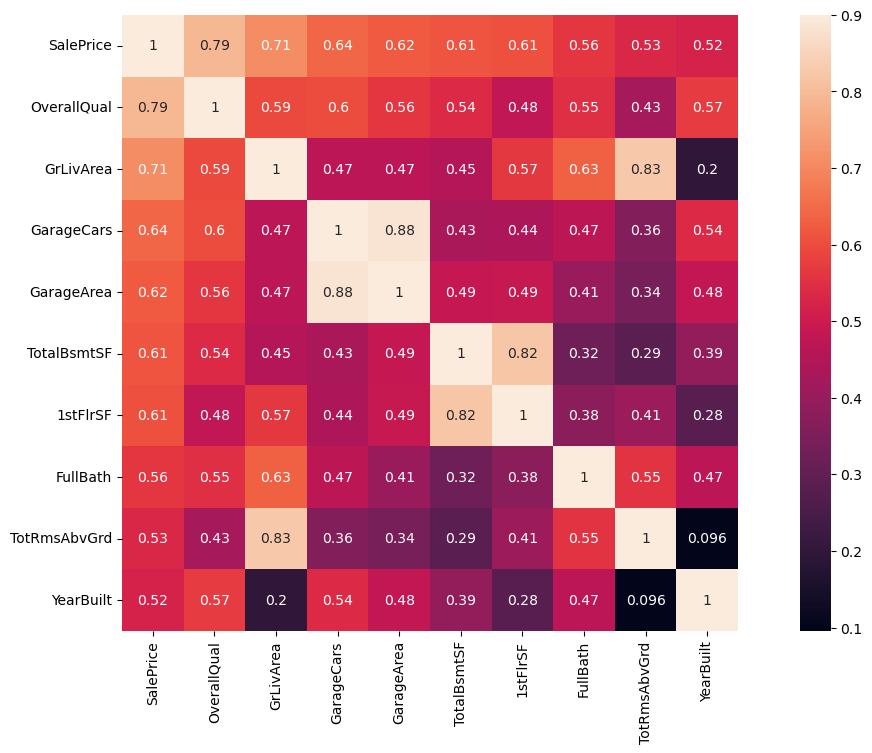

In [10]:
k = 10

col_10 = corr.nlargest(n=k, columns='SalePrice').index
corr_10 = train_data[col_10].corr()

_, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(corr_10, vmax=0.9, square=True, annot=True)

plt.show()

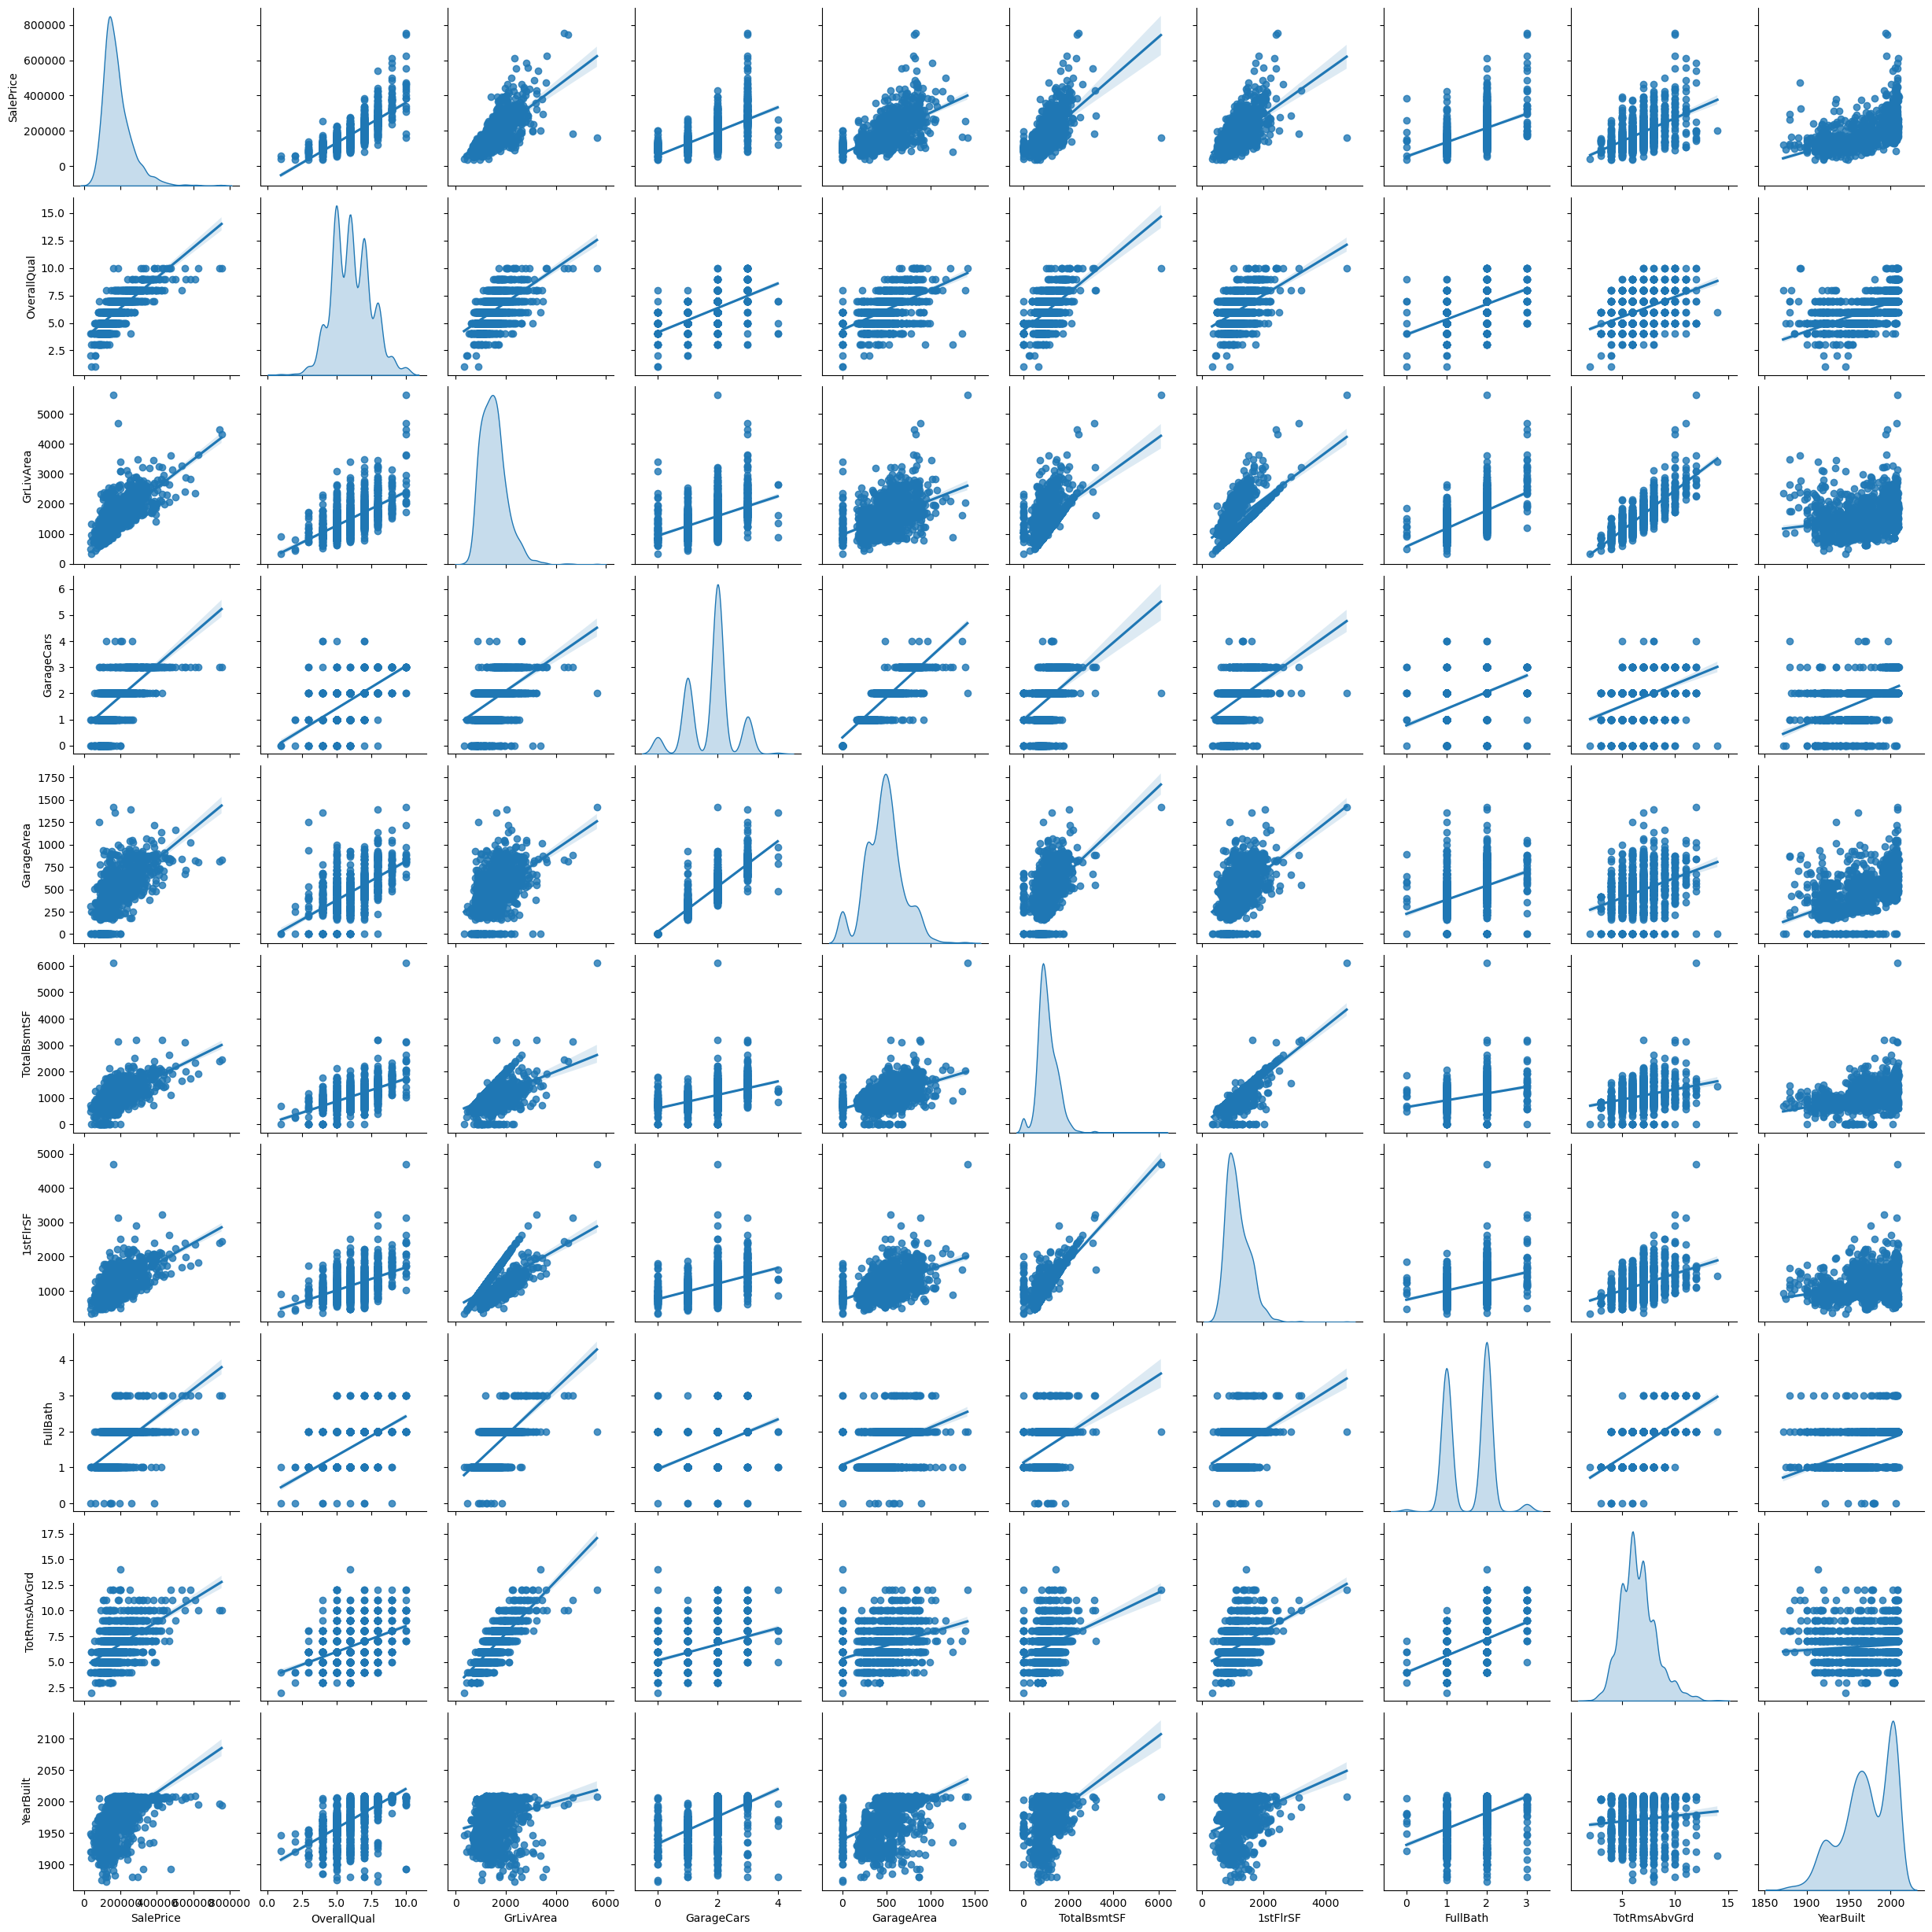

In [11]:
sns.pairplot(train_data[col_10], kind='reg', diag_kind='kde')

plt.show()